# SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
# SVC for classification

In [ ]:
from sklearn.svm import SVRdk
#SVC for regression

- As usual always refer sklearn official domentation if you are not sure about syntax or parameter.

- https://scikit-learn.org/stable/index.html


### What is Supervised Learning?
Supervised learning is a type of machine learning where the model is trained on labeled data. This means:

The training data consists of input features (X) and corresponding output labels (y).

The goal is to learn a mapping from the input features to the output labels so that the model can make predictions on new, unseen data.

- Examples of supervised learning tasks include:

1) Classification: Predicting discrete labels (e.g., spam or not spam).

2) Regression: Predicting continuous values (e.g., house prices).

#### How Does SVM Work?
SVM works by finding the optimal hyperplane that best separates the data into different classes (for classification) or fits the data (for regression). Here’s a breakdown:

1. For Classification:
- Goal: Find the hyperplane that maximizes the margin (the distance between the hyperplane and the nearest data points from each class).

- Support Vectors: The data points closest to the hyperplane are called support vectors. They determine the position and orientation of the hyperplane.

- Kernel Trick: SVM can use kernel functions (e.g., linear, polynomial, radial basis function) to transform the data into a higher-dimensional space where it becomes linearly separable.

2. For Regression (Support Vector Regression - SVR):
- Goal: Find a hyperplane that fits the data while allowing a certain margin of error (epsilon).

- Support Vectors: Data points outside the margin are considered support vectors.

### Intuition Behind SVM
The goal of SVM is to find the optimal hyperplane that best separates the data into different classes. Here’s the step-by-step intuition:

1. What is a Hyperplane?
- In a 2D space, a hyperplane is simply a line that separates the data into two classes.

- In a 3D space, it becomes a plane.

- In higher dimensions, it’s called a hyperplane.

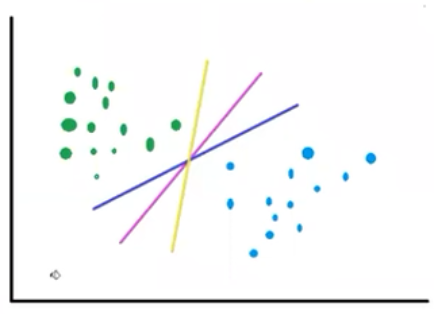

#### The Problem
We have two classes: Green and Blue. We want to draw a line (in 2D) or a hyperplane (in higher dimensions) to separate these classes. However, there are infinitely many ways to draw such a line. The question is: Which line is the best?

#### What SVM Does
SVM doesn’t just draw any line to separate the classes. Instead, it finds the optimal hyperplane that maximizes the margin between the two classes. Here’s how it works:

1. Maximizing the Margin
- The margin is the distance between the hyperplane and the nearest data points from each class (called support vectors).

- SVM tries to find the hyperplane that maximizes this margin.

- The idea is that a larger margin leads to better generalization and reduces the risk of misclassification on new, unseen data.

2. Support Vectors
- The support vectors are the data points closest to the hyperplane.

- These points are critical because they define the position and orientation of the hyperplane.

- If you remove all other points except the support vectors, the hyperplane remains the same.

3. Optimal Hyperplane
- The optimal hyperplane is the one that:

- Correctly classifies all the training data (or as much as possible).

- Maximizes the distance (margin) between itself and the nearest points from each class.

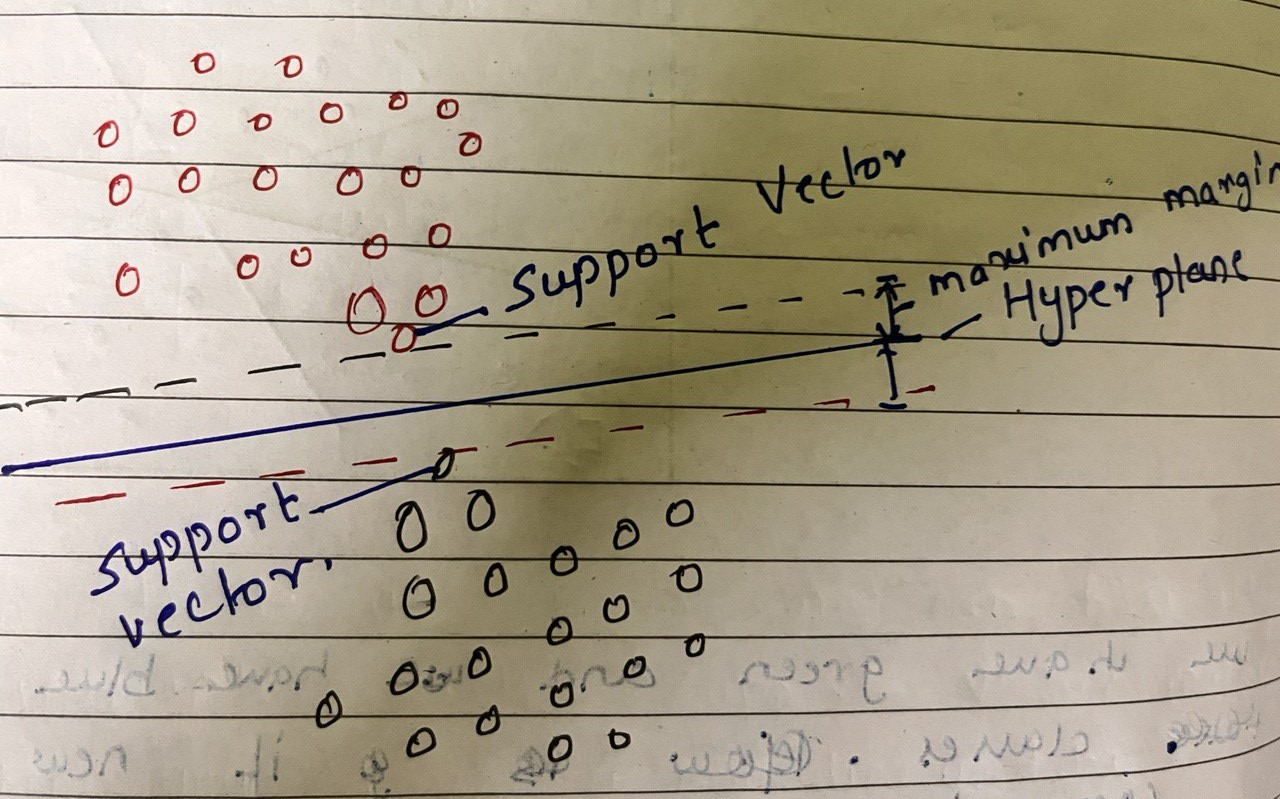

So, this is how SVM works. When you have this kind of data where you can easily divide by a straight line .

# What If you have a data something like this?

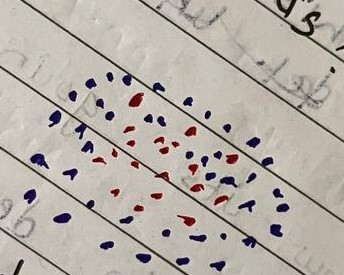

### The Problem with Non-Linear Data
Imagine you have a dataset where the points are arranged in such a way that no straight line (in 2D) or flat hyperplane (in higher dimensions) can separate the two classes. For example:

Blue Class: Points clustered in a circular or curved pattern.

Red Class: Points clustered in another circular or curved pattern around the blue class.

In such cases, a linear SVM (which tries to draw a straight line) will fail because the data is not linearly separable.      

### SVM uses the kernel trick 

Classify data efficiently without explicitly transforming it into a higher-dimensional space.

Choose a Kernel – Select a function (e.g., Linear, Polynomial, RBF) that computes the dot product in the transformed space.
Compute the Decision Boundary – Use the kernel function to find the optimal hyperplane without performing actual transformation.
Classify New Data – Apply the kernel function to determine the side of the hyperplane the new data point falls on.
This trick allows SVM to handle complex, non-linear relationships efficiently.



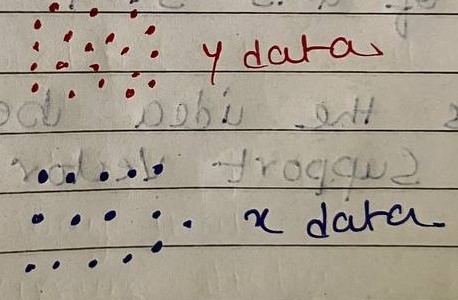


## SVM (Support Vector Machine) Project

In [17]:
#Import necessory libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


#import plotly
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Get the csv data here and print head
data = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\Breast Cancer Wisconsin (Diagnostic) Dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
# Print Summary
print("Shape - - - - > ", data.shape)

Shape - - - - >  (569, 33)


In [25]:
print("Each Column and its type and its count ",'\n')
print(data.info())

Each Column and its type and its count  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null 

In [27]:
# Drop Alert 1 : unnames:32 colums has all null. Safe to remove the column.

data = data.drop(['Unnamed: 32'], axis=1)
data.shape

(569, 32)

In [29]:
# Data Frame Statistics 
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [31]:
# Seems no other columns have null values and it is safe to proceed.

# As we we can see each in feature data is scaled differently. Lets go ahead and scale the data.

In [35]:
scaler = StandardScaler()
x = data.drop('diagnosis',axis=1)
y = data.diagnosis

xscaled = scaler.fit_transform(x)

### Feature Selection Challenge & PCA
#### The Problem
With thousands of features, plotting a heatmap is impractical and time-consuming. In real-time projects, selecting the best features efficiently is crucial.

### PCA (Principal Component Analysis)
PCA is a dimensionality reduction technique, not a feature selection method. It transforms your data into a new set of uncorrelated variables (principal components) that capture the most variance in the data. Here's a simplified explanation:

### Key Points:
#### What PCA Does:

- Reduces the number of features by creating new components (PC1, PC2, etc.).

- These components are linear combinations of the original features.

- It helps when you have too many features and high multicollinearity.

#### When to Use PCA:

- When you have thousands of features and cannot visualize or process them efficiently.

- When features are highly correlated.

- When you want to reduce computational complexity.

#### How PCA Works:

- Step 1: Standardize the data (mean = 0, variance = 1).

- Step 2: Compute covariance matrix to understand feature relationships.

- Step 3: Calculate eigenvalues and eigenvectors to identify directions (principal components) with maximum variance.

- Step 4: Transform the data into the new component space.

#### Eigenvalues and Eigenvectors:

1) Eigenvectors: Directions of the new feature space.

2) Eigenvalues: Magnitude of variance along those directions.

#### Scree Plot:

- A graph of eigenvalues to decide how many components to keep.

- Choose components that explain most of the variance (e.g., 95%).

#### PCA vs Feature Selection:
- PCA: Creates new features (components) from original features. Loses interpretability.

- Feature Selection: Selects a subset of original features. Retains interpretability.

- Example: If you have 1000 features, PCA can reduce them to, say, 10 components that capture 95% of the variance. This makes visualization and modeling easier.


### How PCA Works
1) Standardization – Data must be scaled before applying PCA.
Understanding Dimensions
- One feature (X) → One-dimensional (1D) space.
- Two features (X, Y) → Two-dimensional (2D) space.
- More dimensions increase calculations exponentially.
  
2) Finding Principal Components
- Eigenvectors → Indicate the direction of maximum variance.
- Eigenvalues → Represent the magnitude of variance.
- The first component (PC1) carries the most information, followed by PC2, PC3, etc.
  
3) Choosing the Number of Components
- If you have 4000 features, PCA will generate 4000 components.
- A scree plot helps determine the optimal number of components based on explained variance.


#### Steps in PCA
1) Data Transformation
2) Standardization
3) Finding Eigenvectors (Direction of Maximum Variance)
4) Finding Eigenvalues (Variance Magnitude)
5) Using Scree Plot for Component Selection

In [48]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()
pca.fit_transform(xscaled)

array([[ 9.18319983e+00,  1.97127137e+00, -1.17162471e+00, ...,
         3.39113949e-02, -4.55717832e-02,  4.71657487e-02],
       [ 2.38329766e+00, -3.75345877e+00, -5.80228664e-01, ...,
        -3.26298575e-02,  5.90208043e-03,  1.84483129e-03],
       [ 5.74247239e+00, -1.08035048e+00, -5.33087882e-01, ...,
        -4.70218699e-02, -3.28969989e-03, -7.35346039e-04],
       ...,
       [ 1.25189010e+00, -1.89397674e+00,  5.34466848e-01, ...,
         2.56758630e-03, -6.34033194e-03, -3.80807814e-03],
       [ 1.03650353e+01,  1.69639755e+00, -1.90741785e+00, ...,
         6.80834660e-02,  8.43022898e-02,  2.37630430e-02],
       [-5.47826365e+00, -6.72788035e-01,  1.47716504e+00, ...,
         9.51329032e-03,  6.10512178e-02,  1.94561856e-02]])

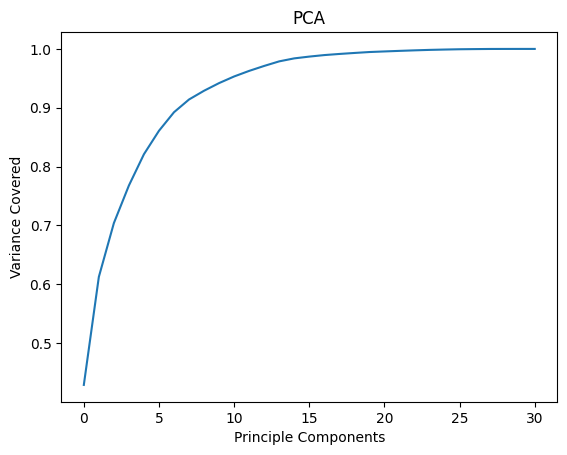

In [52]:
# Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

Around 13 principle components are able to to explain >95% Variance. Its saFe to consider starting 13 PC.

In [55]:
pca = PCA(n_components=13)
new_data = pca.fit_transform(xscaled)
princi_comp = pd.DataFrame(new_data,
                           columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

It works like feature, but it is component.

In [ ]:
# Replace label column (diagnosis) into binary codes.

data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})
y = data['diagnosis']

In [59]:
# Data split into train test split
xtrain, xtest, ytrain, ytest = train_test_split(princi_comp, y, test_size=0.25, random_state=355)

In [89]:
def print_score(model,xtrain,xtest,ytrain,ytest,train=True):
    
    if train:
        ypred_train = model.predict(xtrain)
        print("  =================Training Score==================  ")
        print("\nAccuracy Score ==> ",accuracy_score(ytrain,ypred_train))
        
    elif train== False:
        ypred_test = model.predict(xtest)
        print("\n ================= Testing Score =================")
        print("\nAccuracy Score==> ",accuracy_score(ytest,ypred_test))
        print("Classification Report ==> \n", classification_report(ytest,ypred_test))

In [63]:
# Lets Build a Model
from sklearn.svm import SVC
svc = SVC()

In [65]:
# SVC model training and printing train and test score 

svc.fit(xtrain,ytrain)

SVC()

In [93]:
# Call the function and pass dataset to check train and test score .

print_score(svc,xtrain,xtest,ytrain,ytest,train=True)

print_score(svc,xtrain,xtest,ytrain,ytest,train=False)

  =================Training Score==================  

Accuracy Score ==>  0.9812206572769953

 ================= Testing Score =================

Accuracy Score==>  0.9790209790209791
Classification Report ==> 
               precision    recall  f1-score   support

           B       0.97      1.00      0.98        93
           M       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [77]:
# Similarly you can build other models and check the score.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
gbdt = GradientBoostingClassifier()
rf = RandomForestClassifier()

In [85]:
gbdt.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)
print("All Models are trained.")

All Models are trained.


In [91]:
# Call the function and pass dataset to check train and test score.

print_score(gbdt,xtrain,xtest,ytrain,ytest,train=True)

print_score(gbdt,xtrain,xtest,ytrain,ytest,train=False)

  =================Training Score==================  

Accuracy Score ==>  1.0

 ================= Testing Score =================

Accuracy Score==>  0.951048951048951
Classification Report ==> 
               precision    recall  f1-score   support

           B       0.96      0.97      0.96        93
           M       0.94      0.92      0.93        50

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [95]:
# Call the function and pass dataset to check train and test score.

print_score(rf,xtrain,xtest,ytrain,ytest,train=True)

print_score(rf,xtrain,xtest,ytrain,ytest,train=False)

  =================Training Score==================  

Accuracy Score ==>  1.0

 ================= Testing Score =================

Accuracy Score==>  0.958041958041958
Classification Report ==> 
               precision    recall  f1-score   support

           B       0.96      0.98      0.97        93
           M       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [105]:
# So we are going with SVM as it has high testing accuracy (98%).
from sklearn.model_selection import GridSearchCV

### Important hyperparameters in Support Vector Machines (SVM):
C and Gamma: 

#### 1. C (Regularization Parameter):
- What it does: Controls the trade-off between maximizing the margin and minimizing classification errors.

- How it works:

  - Small C: Allows more errors (misclassifications) but focuses on a larger margin. This means the model is more tolerant of errors and may generalize better to new data.

  - Large C: Penalizes errors heavily, leading to a smaller margin and fewer misclassifications. This can lead to overfitting if C is too large.

- Intuition:
Think of C as a "budget" for errors. A small C means you have a large budget for errors, while a large C means you have a small budget.


#### 2. Gamma (Kernel Coefficient):
What it does: Defines how far the influence of a single training example reaches. It controls the curvature of the decision boundary.

- How it works:

  - High Gamma: The model considers only nearby points, leading to a more complex, wiggly decision boundary (high curvature). This can cause overfitting.

  - Low Gamma: The model considers points farther away, leading to a smoother, simpler decision boundary (low curvature). This can cause underfitting.

- Intuition:
Think of Gamma as the "reach" of each data point. A high Gamma means each point has a small reach, while a low Gamma means each point has a large reach.

In [107]:
param_grid = {'C':[5,10,20],
             'gamma':[0.001,0.01,0.02,0.002]}

In [109]:
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(xtrain,ytrain)



#Best Parameters
gridsearch.best_params_

{'C': 20, 'gamma': 0.002}

In [111]:
# Set best parameters
svc = SVC(C=5,gamma=0.01)
svc.fit(xtrain,ytrain)


# Call the function and pass dataset to check train and test score.

print_score(svc,xtrain,xtest,ytrain,ytest,train=True)

print_score(svc,xtrain,xtest,ytrain,ytest,train=False)

  =================Training Score==================  

Accuracy Score ==>  0.9812206572769953

 ================= Testing Score =================

Accuracy Score==>  0.9790209790209791
Classification Report ==> 
               precision    recall  f1-score   support

           B       0.97      1.00      0.98        93
           M       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



### Pipelines

In real-world machine learning projects, pipelines are essential for creating a clean, efficient, and reproducible workflow. A pipeline allows you to chain together multiple steps, such as preprocessing, feature selection, and model training, into a single object. This ensures that the data flows seamlessly through the entire process without manual intervention.

In [124]:
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [126]:
df = pd.read_csv(r"C:\Users\sharm\Downloads\Datasets\Breast Cancer Wisconsin (Diagnostic) Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [128]:
x = df.drop(['Unnamed: 32','diagnosis'],axis=1)
y = df.diagnosis

In [130]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=355)

In [134]:
pipe = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Standardize the data
    ('pca', PCA(n_components=13)),  # Step 2: Apply PCA for dimensionality reduction
    ('svm', SVC(C=7, gamma=0.01))   # Step 3: Train an SVM classifier
])

In [136]:
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)

In [138]:
accuracy_score(ytest,ypred)

0.9790209790209791

## Key Points 
- You need to know the execution sequence (Example- imputation techniques should by applied before StandardScaler and the PCA).

- You Cannot use pipeline for plotting graphs and analysis.

- Analysis can be done before creating a pipeline.

- Do not use unncecssary methods in the pipeline.

- You can also use any encoding/imputation techniques in the pipeline like:


  1) Imputation: Handle missing values.
 
  - ("Simple Imputer', SimpleImputer(Strategy='mean'))  # fit_transform


   2)  Encoding: Convert categorical variables to numerical.
 
   - ('OHE', OneHotEncoder(handle_unknown="ignore'))     # fit_transform